<a href="https://colab.research.google.com/github/rajesh-mahara/ML-bootcamp/blob/main/USA_housing_DATASET_LLinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [27]:
import pandas as pd
df = pd.read_csv("realtor-data.zip.csv")

In [28]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [ ]:
df.isnull().sum()

status                 0
bed               129840
bath              113884
acre_lot          266642
city                  72
state                  0
zip_code             204
house_size        292886
prev_sold_date    459101
price                 71
dtype: int64

In [29]:
df = df.dropna()

In [ ]:
df.isnull().sum()

status            0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
price             0
dtype: int64

In [15]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [17]:
df.head(1)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0


In [21]:
df[['city','price','state']]

,city,price,state
829,Dorado,110000.0,Puerto Rico
3380,Dorado,110000.0,Puerto Rico
5083,Dorado,110000.0,Puerto Rico
5387,Dorado,110000.0,Puerto Rico
9053,Dorado,110000.0,Puerto Rico
...,...,...,...
904932,Armonk,3695000.0,New York
904934,Armonk,5600000.0,New York
904935,Armonk,3650000.0,New York
904937,Armonk,4999999.0,New York


In [30]:
df = df.drop(["status","bed","bath",'zip_code','prev_sold_date'], axis = 1)

In [24]:
df.columns

Index(['acre_lot', 'city', 'state', 'house_size', 'price'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [34]:
for i in df[["city","state"]]:
  df[i] = le.fit_transform(df[i])

In [35]:
df.head()

,acre_lot,city,state,house_size,price
829,0.09,379,8,1192.0,110000.0
3380,0.09,379,8,1192.0,110000.0
5083,0.09,379,8,1192.0,110000.0
5387,0.09,379,8,1192.0,110000.0
9053,0.09,379,8,1192.0,110000.0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-37-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

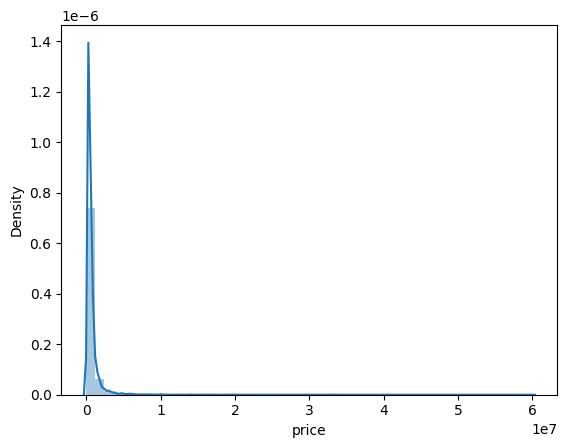

In [37]:
sns.distplot(df["price"])

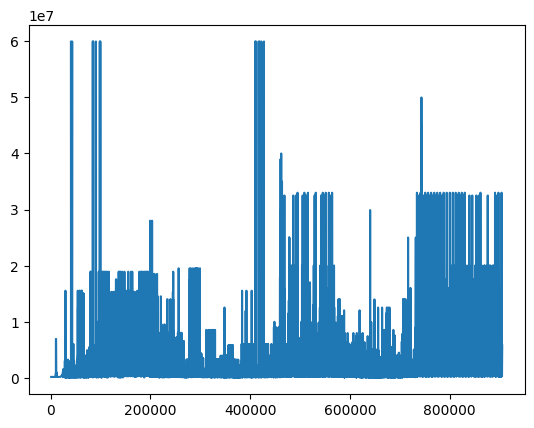

In [38]:
plt.plot(df['price'])

<ipython-input-39-852d37960520>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['acre_lot'])


<Axes: xlabel='acre_lot', ylabel='Density'>

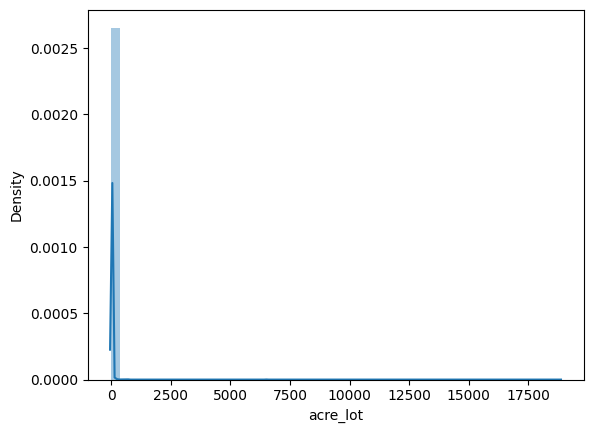

In [39]:
sns.distplot(df['acre_lot'])

In [40]:
X = df.drop(['price'], axis = 1)

In [41]:
y = df['price']

In [43]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
predicted_y_values = lr.predict(X_test)

In [59]:
y_test

465333    435000.0
749779    999999.0
480824    749000.0
108459    600000.0
551354    669900.0
            ...   
393531    144900.0
234985    389900.0
693040    399900.0
632173    399900.0
197385    829900.0
Name: price, Length: 67988, dtype: float64

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [63]:
corrdf = pd.DataFrame(lr.coef_,X.columns, columns = ['coeff'])

In [65]:
corrdf

,coeff
acre_lot,37.910016
city,-60.803073
state,7506.477511
house_size,275.723055


<ipython-input-67-bf534174e12f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predicted_y_values)


<Axes: xlabel='price', ylabel='Density'>

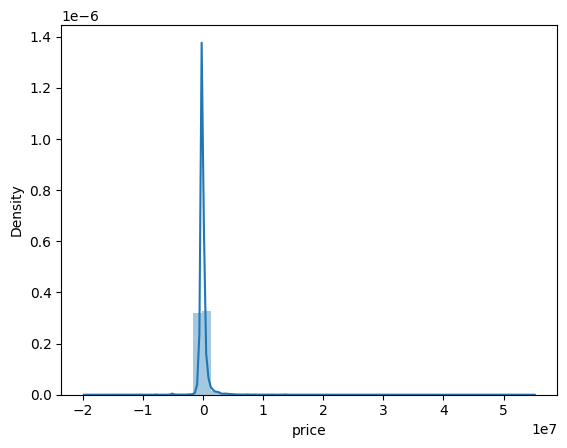

In [67]:
sns.distplot(y_test - predicted_y_values)

In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error",mean_absolute_error(y_test,predicted_y_values))
print("mean squred error",mean_squared_error(y_test,predicted_y_values))
print("root mean squred error",np.sqrt(mean_squared_error(y_test,predicted_y_values)))


mean absolute error 424924.09670406405
mean squred error 1518371546288.827
root mean squred error 1232222.1984239803


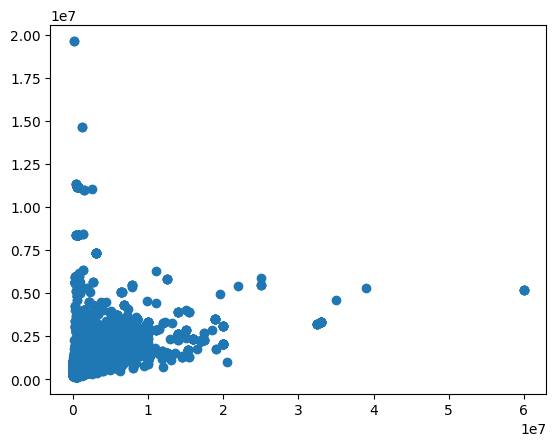

In [70]:
plt.scatter(y_test,predicted_y_values)

In [71]:
X_test

,acre_lot,city,state,house_size
465333,0.08,712,5,29997.0
749779,0.34,1331,5,3150.0
480824,0.06,1473,6,2080.0
108459,0.69,1692,3,1829.0
551354,0.09,1473,6,1560.0
...,...,...,...,...
393531,0.36,1595,0,860.0
234985,0.21,326,9,912.0
693040,0.07,529,5,1624.0
632173,0.13,1732,1,2500.0


In [85]:
data = [0.08, 712, 5 , 29997]
columns = ['acre_lot', 'city', 'state', 'house_size']
test1 = pd.DataFrame( [data ], columns = columns)

In [86]:
test1.columns

Index(['acre_lot', 'city', 'state', 'house_size'], dtype='object')

In [96]:
p = lr.predict(test1)

In [88]:
df.head()

,acre_lot,city,state,house_size,price
829,0.09,379,8,1192.0,110000.0
3380,0.09,379,8,1192.0,110000.0
5083,0.09,379,8,1192.0,110000.0
5387,0.09,379,8,1192.0,110000.0
9053,0.09,379,8,1192.0,110000.0


In [97]:
p

array([8391007.07837923])

In [ ]:
df1.iloc[465333]

In [92]:
df1 = pd.read_csv("realtor-data.zip.csv")

In [95]:
df1.iloc[465333]

status              for_sale
bed                      7.0
bath                     3.0
acre_lot                0.08
city               Irvington
state             New Jersey
zip_code              7111.0
house_size           29997.0
prev_sold_date    2017-03-17
price               435000.0
Name: 465333, dtype: object